# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# read the dataset
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# The above data doesn't have missing values and all features are float64 type.

In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a regplot and then pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

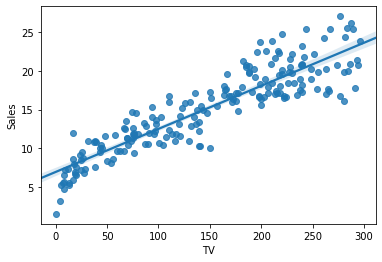

In [11]:
# visualise the data
sns.regplot(x='TV', y='Sales', data=advertising)

**Observation**
* Pretty nice straight line, totally appropriate for linear regression fit.

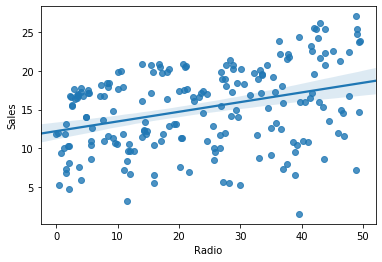

In [12]:
sns.regplot(x='Radio', y='Sales', data=advertising)

**Observation**
* The relationship between radio and sales is not as smooth in the sense of linear regression as it was in case of TV. Data is scattered on y-axis and slope is also lesser.

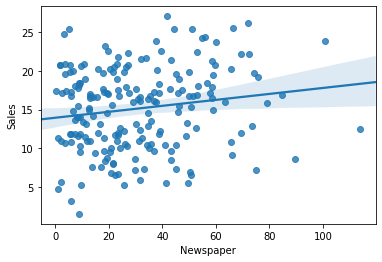

In [13]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

**Observation**
* For newspaper data points are scattered around y-axis

In [16]:
# Pairplot

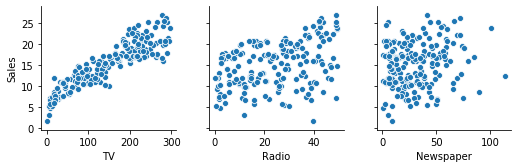

In [17]:
sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

### Observations

* TV vs Sale has very high +ve correlation.
* We also have +ve correlation between Radio and Sales, but the correlation is not strong as in case of TV
* Newspaper and sales have very less +ve correlation.

### Another way to visualize correlation between multiple variable simultaneously is using Heatmap

In [18]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


(4.0, 0.0)

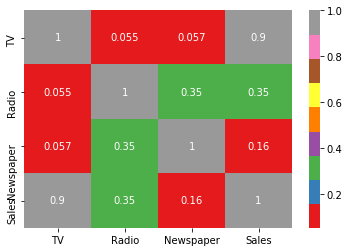

In [28]:
# Heatmap
ax = sns.heatmap(advertising.corr(), annot=True, cmap="Set1")
top,bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.


---

## Steps:
- Create X (predictor variable TV) and y (target variable -- Sales)
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the cofficients)
- Evaluate the model (training set, test set)

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [59]:
# create X & y. Convention is X(predictor variable) is capital. Here in out case it is one column, but we can have a dataframe 
# of predictor variables and y is target variable.
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [41]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, test_size=0.3, random_state=100)

In [43]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [46]:
#training the model
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [ ]:
# y = c + m1. X1
# y = c.const + m1. TV

In [51]:
# fitting the model

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [53]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

#### Observations
$Sales = 6.94 + 0.05 \times TV$

* The above interprets that slope is +ve (as amount splent on TV increases Sales increases). The above equations says that if we increase the amount of advertisment spent on TV increases by 1 units then amount of Sales increases by 0.05 units.
* Intercept is +ve number which means that if we spend zero dollar on TV, then sales will be 6.94

In [56]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.52e-52
Time:                        17:17:49   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

![title](summary-stats.png)

### F-statistic

You were introduced to a new term named **F-statistic** and **Prob(F-statistic)**. Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient $β1$ outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.

The heuristic is similar to what you learnt in the normal p-value calculation as well. If the **'Prob (F-statistic)'** is less than **0.05**, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is **1.52e-52**  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

This will be more appreciable when you study multiple linear regression since there you have a lot of betas for the different predictor variables and thus there it is very helpful in determining if all the predictor variables together as a whole are significant or not or simply put, it tells you whether the model fit as a whole is significant or not.

### R-squared

Like you studied earlier as well, R-squared value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about **0.816** which means that the model is able to explain **81.6%** of the variance which is pretty good.

### Coefficients and p-values:

The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be **0.0545** with a standard error of about **0.002**. Thus, you got a t-value of **24.722** which lead to a practically **zero p-value**. Hence, you can say that your coefficient is indeed significant. 

###### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

###### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

### Scatter Plot of the model

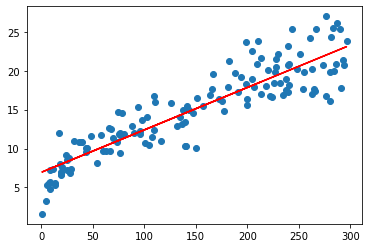

In [63]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')
plt.show()

### OR

In [66]:
y_train_pred = lr_model.predict(X_train_sm)

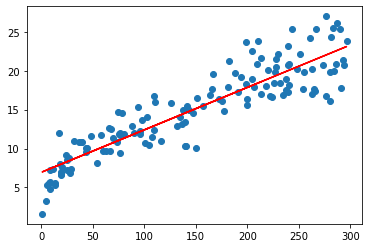

In [67]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

#### Observation
* Blue dots are the actual y value and red points are the predicted y value by the model. 

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

* We are interested in looking at the distribution of the error terms. So we have **y_train** (which are the values of sales variable in the training set) , **y_train_pred** (we have a model, the red line which makes predicition for the y_trains)

* $error = f(y\_train, y\_train\_pred)$ : So error is function of y_train and y_train_pred

In [68]:
res = y_train - y_train_pred

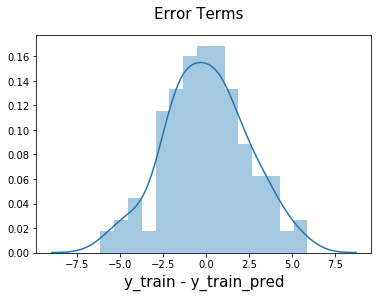

In [71]:
# plot the residuals
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### Observations
The residuals are following the normally distributed with a mean 0. All good!

### Looking for patterns in the residuals

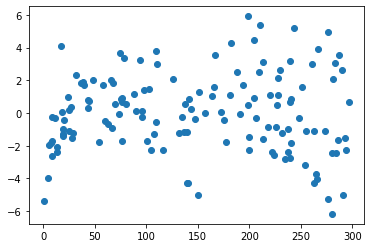

In [73]:
plt.scatter(X_train,res)
plt.show()

The residuals are normally distributed, and there are no visible patterns in the error terms (except for the fact that the variance seems to be increasing a little for the higher values). So, this model fit looks good.

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [74]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

In [76]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Checking the R-squared on the test set

In [80]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

##### Looking at the RMSE
* RMSE (Root Mean Squared Error) is a metric that tells you the deviation of the predicted values by a model from the actual observed values. So, since it is a sort of error term, it is better to have a low RMSE.

In [83]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

2.019296008966233

##### Visualizing the fit on the test set

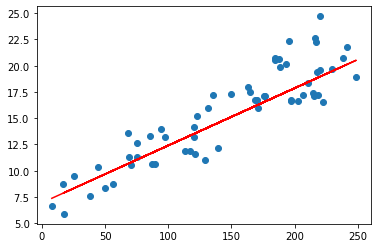

In [84]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()